In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import shutil
import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K


AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 32
EPOCHS = 50
CROP_TO = 32
SEED = 26

PROJECT_DIM = 128
LATENT_DIM = 512
WEIGHT_DECAY = 0.0005
learning_rate = 0.0001
batch_size = 32
hidden_units = 512
projection_units = 256
num_epochs = 2
dropout_rate = 0.5

temperature = 0.05

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

from glob import glob
trn='D:/D-Video/PennA/Penn_Action/*/'
tr= glob(trn)

len(tr)



15

In [2]:
import tensorflow as tf

# Explicitly set device to CPU
#tf.config.set_visible_devices([], 'GPU')

# Now TensorFlow will use CPU instead of GPU

In [3]:
label = 0
XT = []
YT = []
for i in tr:

    lst = glob(i+"/*")
    
    for j in lst:
        imgs = glob(j+"/*")
        #print(np.shape(imgs))
        XT.append(imgs)
        YT.append(label)
    
    label=label+1

print( len(XT), len(YT), np.shape(XT[0]) , YT[0] )

2326 2326 (151,) 0


In [4]:
i = 9
x = glob(tr[i]+'/*/')
vid = glob(x[i] +'/*')
vid[:2]


['D:/D-Video/PennA/Penn_Action\\pushup\\1357\\000001.jpg',
 'D:/D-Video/PennA/Penn_Action\\pushup\\1357\\000002.jpg']

C:\Users\shaif\AppData\Local\Temp\ipykernel_17284\958681761.py:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((56,56), Image.ANTIALIAS)


Combined image shape: (224, 224, 3)


C:\Users\shaif\AppData\Local\Temp\ipykernel_17284\958681761.py:56: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = q.resize((560,560), Image.ANTIALIAS)


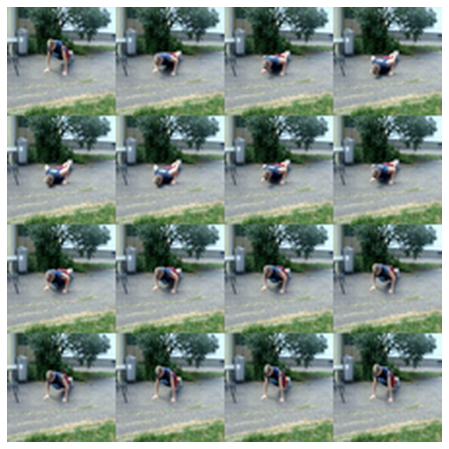

In [5]:
from PIL import Image
import numpy as np

def resize_images(q):
    img = Image.fromarray(q)
    resized_img = img.resize((56,56), Image.ANTIALIAS)
    return resized_img

def generate_and_sort(n):
    unique_numbers = set()
    while len(unique_numbers) < 16:
        unique_numbers.add(random.randint(0, n))
    sorted_numbers = sorted(unique_numbers)
    return sorted_numbers


def prepare_videoes(image_paths):
    images = []
    
    for path in image_paths:
        # Load image
        img = Image.open(path)
        
        # Convert to RGB if not already
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        # Resize the image
        img = img.resize((56,56), Image.ANTIALIAS)
        
        # Convert to numpy array
        img_array = np.array(img)
        
        # Append the processed image to the list
        images.append(img_array)
    
    n = np.shape(images)[0] - 1
    sortn = generate_and_sort(n)
    #print(sortn)
    img_parts = [images[i] for i in sortn]
    #print(np.shape(img_parts))
    
    combined_image = np.zeros((224, 224, 3), dtype=np.uint8)
    
    for i, img_part in enumerate(img_parts):
        row = i // 4
        col = i % 4
        combined_image[row*56:(row+1)*56, col*56:(col+1)*56, :] = img_part
        
    return combined_image

combined_image = prepare_videoes(vid)
print("Combined image shape:", combined_image.shape)

q =  Image.fromarray(combined_image)
resized_image = q.resize((560,560), Image.ANTIALIAS)
# Display the resized image using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(resized_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [6]:
BATCH_SIZE = 32
# Width and height of image
IMAGE_SIZE = 224

In [7]:
class My_Test_Generator(keras.utils.Sequence):
    def __init__(self, filename, batch_size):
        self.filename = filename
        self.batch_size = batch_size
        
    def __len__(self):
        return (np.ceil(len(self.filename) / float(self.batch_size))).astype(np.int32)
    
    def __getitem__(self, idx):
        batch_x = self.filename[idx * self.batch_size : (idx+1) * self.batch_size]
        batch_y = batch_x  # Assuming y_train is similar to x_train for demonstration
        
        x_batch = np.array([prepare_videoes(filename) for filename in batch_x]) / 255.0
        y_batch = np.array([prepare_videoes(filename) for filename in batch_y]) / 255.0
        
        return x_batch, y_batch
    
my_generator = My_Test_Generator(XT, batch_size)

In [11]:
x = my_generator.__getitem__(0)

C:\Users\shaif\AppData\Local\Temp\ipykernel_17284\958681761.py:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((56,56), Image.ANTIALIAS)


In [12]:
np.shape(x[0])

(32, 224, 224, 3)

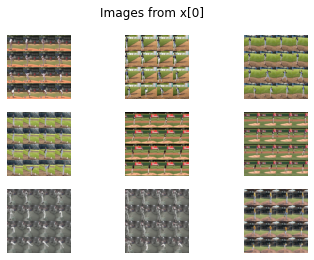

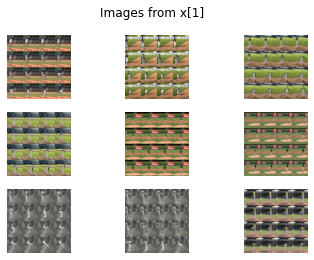

In [10]:
fig, axs = plt.subplots(3, 3)
fig.suptitle("Images from x[0]")
for i in range(3):
    for j in range(3):
        axs[i][j].imshow(x[0][3 * i + j])
        axs[i][j].axis("off")

# Plot images from x[1]
fig1, axs1 = plt.subplots(3, 3)
fig1.suptitle("Images from x[1]")
for i in range(3):
    for j in range(3):
        axs1[i][j].imshow(x[1][3 * i + j])
        axs1[i][j].axis("off")

plt.show()

In [13]:
class BarlowLoss(keras.losses.Loss):
    """BarlowLoss class.

    BarlowLoss class. Creates a loss function based on the cross-correlation
    matrix.

    Attributes:
        batch_size: the batch size of the dataset
        lambda_amt: the value for lambda(used in cross_corr_matrix_loss)

    Methods:
        __init__: gets instance variables
        call: gets the loss based on the cross-correlation matrix
          make_diag_zeros: Used in calculating off-diagonal section
          of loss function; makes diagonals zeros.
        cross_corr_matrix_loss: creates loss based on cross correlation
          matrix.
    """

    def __init__(self, batch_size: int):
        """__init__ method.

        Gets the instance variables

        Arguments:
            batch_size: An integer value representing the batch size of the
              dataset. Used for cross correlation matrix calculation.
        """

        super().__init__()
        self.lambda_amt = 5e-3
        self.batch_size = batch_size

    def get_off_diag(self, c: tf.Tensor) -> tf.Tensor:
        """get_off_diag method.

        Makes the diagonals of the cross correlation matrix zeros.
        This is used in the off-diagonal portion of the loss function,
        where we take the squares of the off-diagonal values and sum them.

        Arguments:
            c: A tf.tensor that represents the cross correlation
              matrix

        Returns:
            Returns a tf.tensor which represents the cross correlation
            matrix with its diagonals as zeros.
        """

        zero_diag = tf.zeros(c.shape[-1])
        return tf.linalg.set_diag(c, zero_diag)

    def cross_corr_matrix_loss(self, c: tf.Tensor) -> tf.Tensor:
        """cross_corr_matrix_loss method.

        Gets the loss based on the cross correlation matrix.
        We want the diagonals to be 1's and everything else to be
        zeros to show that the two augmented images are similar.

        Loss function procedure:
        take the diagonal of the cross-correlation matrix, subtract by 1,
        and square that value so no negatives.

        Take the off-diagonal of the cc-matrix(see get_off_diag()),
        square those values to get rid of negatives and increase the value,
        and multiply it by a lambda to weight it such that it is of equal
        value to the optimizer as the diagonal(there are more values off-diag
        then on-diag)

        Take the sum of the first and second parts and then sum them together.

        Arguments:
            c: A tf.tensor that represents the cross correlation
              matrix

        Returns:
            Returns a tf.tensor which represents the cross correlation
            matrix with its diagonals as zeros.
        """

        # subtracts diagonals by one and squares them(first part)
        c_diff = tf.pow(tf.linalg.diag_part(c) - 1, 2)

        # takes off diagonal, squares it, multiplies with lambda(second part)
        off_diag = tf.pow(self.get_off_diag(c), 2) * self.lambda_amt

        # sum first and second parts together
        loss = tf.reduce_sum(c_diff) + tf.reduce_sum(off_diag)

        return loss

    def normalize(self, output: tf.Tensor) -> tf.Tensor:
        """normalize method.

        Normalizes the model prediction.

        Arguments:
            output: the model prediction.

        Returns:
            Returns a normalized version of the model prediction.
        """

        return (output - tf.reduce_mean(output, axis=0)) / tf.math.reduce_std(
            output, axis=0
        )

    def cross_corr_matrix(self, z_a_norm: tf.Tensor, z_b_norm: tf.Tensor) -> tf.Tensor:
        """cross_corr_matrix method.

        Creates a cross correlation matrix from the predictions.
        It transposes the first prediction and multiplies this with
        the second, creating a matrix with shape (n_dense_units, n_dense_units).
        See build_twin() for more info. Then it divides this with the
        batch size.

        Arguments:
            z_a_norm: A normalized version of the first prediction.
            z_b_norm: A normalized version of the second prediction.

        Returns:
            Returns a cross correlation matrix.
        """
        return (tf.transpose(z_a_norm) @ z_b_norm) / self.batch_size

    def call(self, z_a: tf.Tensor, z_b: tf.Tensor) -> tf.Tensor:
        """call method.

        Makes the cross-correlation loss. Uses the CreateCrossCorr
        class to make the cross corr matrix, then finds the loss and
        returns it(see cross_corr_matrix_loss()).

        Arguments:
            z_a: The prediction of the first set of augmented data.
            z_b: the prediction of the second set of augmented data.

        Returns:
            Returns a (rank-0) tf.Tensor that represents the loss.
        """

        z_a_norm, z_b_norm = self.normalize(z_a), self.normalize(z_b)
        c = self.cross_corr_matrix(z_a_norm, z_b_norm)
        loss = self.cross_corr_matrix_loss(c)
        return loss

In [38]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D

class ResNet34:

    def __call__(self, shape=(224, 224, 3)):
        
        inputs = Input(shape=shape)
        base_model = ResNet50(include_top=False, weights="imagenet", input_shape=shape, pooling="avg")
        x = base_model(inputs)
        output = Dense(2048)(x)
        new_model = Model(inputs=inputs, outputs=output)

        return new_model

resnet = ResNet34()()
#resnet.summary()

In [39]:
def build_twin() -> keras.Model:
    """build_twin method.

    Builds a barlow twins model consisting of an encoder(resnet-34)
    and a projector, which generates embeddings for the images

    Returns:
        returns a barlow twins model
    """

    # number of dense neurons in the projector
    n_dense_neurons = 5000

    # encoder network
    resnet = ResNet34()()
    last_layer = resnet.layers[-1].output

    # intermediate layers of the projector network
    n_layers = 2
    for i in range(n_layers):
        dense = tf.keras.layers.Dense(n_dense_neurons, name=f"projector_dense_{i}")
        if i == 0:
            x = dense(last_layer)
        else:
            x = dense(x)
        x = tf.keras.layers.BatchNormalization(name=f"projector_bn_{i}")(x)
        x = tf.keras.layers.ReLU(name=f"projector_relu_{i}")(x)

    x = tf.keras.layers.Dense(n_dense_neurons, name=f"projector_dense_{n_layers}")(x)

    model = keras.Model(resnet.input, x)
    return model

class BarlowModel(keras.Model):
    """BarlowModel class.

    BarlowModel class. Responsible for making predictions and handling
    gradient descent with the optimizer.

    Attributes:
        model: the barlow model architecture.
        loss_tracker: the loss metric.

    Methods:
        train_step: one train step; do model predictions, loss, and
            optimizer step.
        metrics: Returns metrics.
    """

    def __init__(self):
        super().__init__()
        self.model = build_twin()
        self.loss_tracker = keras.metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, batch: tf.Tensor) -> tf.Tensor:
        """train_step method.

        Do one train step. Make model predictions, find loss, pass loss to
        optimizer, and make optimizer apply gradients.

        Arguments:
            batch: one batch of data to be given to the loss function.

        Returns:
            Returns a dictionary with the loss metric.
        """

        # get the two augmentations from the batch
        y_a, y_b = batch

        with tf.GradientTape() as tape:
            # get two versions of predictions
            z_a, z_b = self.model(y_a, training=True), self.model(y_b, training=True)
            loss = self.loss(z_a, z_b)

        grads_model = tape.gradient(loss, self.model.trainable_variables)

        self.optimizer.apply_gradients(zip(grads_model, self.model.trainable_variables))
        self.loss_tracker.update_state(loss)

        return {"loss": self.loss_tracker.result()}
    

In [ ]:
# sets up model, optimizer, loss
bm = BarlowModel()
# chose the LAMB optimizer due to high batch sizes. Converged MUCH faster
# than ADAM or SGD
optimizer = 'Adam'
loss = BarlowLoss(BATCH_SIZE)
bm.compile(optimizer=optimizer, loss=loss)
history = bm.fit_generator(generator=my_generator, epochs = 2)
plt.plot(history.history["loss"])
#plt.show()

C:\Users\shaif\AppData\Local\Temp\ipykernel_9140\1653549926.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = bm.fit_generator(generator=my_generator, epochs = 2)
C:\Users\shaif\AppData\Local\Temp\ipykernel_9140\958681761.py:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((56,56), Image.ANTIALIAS)


Epoch 1/2


In [13]:
class SupervisedContrastiveLoss(tf.keras.losses.Loss):
    def __init__(self, temperature=0.1, **kwargs):
        super(SupervisedContrastiveLoss, self).__init__(**kwargs)
        self.temperature = temperature

    def call(self, y_true, y_pred):
        # Split y_pred into proj_1 and proj_2
        batch_size = tf.shape(y_pred)[0] // 2
        proj_1 = y_pred[:batch_size]
        proj_2 = y_pred[batch_size:]

        # Concatenate labels
        labels = tf.concat([y_true, y_true], axis=0)

        # Normalize projections
        projections = tf.math.l2_normalize(tf.concat([proj_1, proj_2], axis=0), axis=1)

        # Compute similarity matrix
        similarities = tf.matmul(projections, tf.transpose(projections)) / self.temperature

        # Mask out self-similarities
        mask = tf.eye(tf.shape(similarities)[0], dtype=tf.bool)
        similarities = tf.where(mask, tf.zeros_like(similarities), similarities)

        # Exponentiate similarities
        exp_similarities = tf.exp(similarities)

        # Compute denominator for contrastive loss
        denominator = tf.reduce_sum(exp_similarities, axis=1, keepdims=True)

        # Compute supervised contrastive loss
        positive_mask = tf.equal(labels[:, None], labels[None, :])
        positive_similarities = tf.where(positive_mask, exp_similarities, tf.zeros_like(exp_similarities))
        numerator = tf.reduce_sum(positive_similarities, axis=1)

        loss = -tf.reduce_mean(tf.math.log(numerator / denominator))
        return loss


In [14]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Model

def create_supervised_contrastive_model(input_shape=(224, 224, 3), projection_dim=128):
    resnet_base = ResNet50(include_top=False, weights="imagenet", pooling="avg")

    inputs_1 = layers.Input(shape=input_shape, name="input_1")
    inputs_2 = layers.Input(shape=input_shape, name="input_2")

    features_1 = resnet_base(inputs_1)
    features_2 = resnet_base(inputs_2)

    projection_1 = layers.Dense(512, activation='relu')(features_1)
    projection_1 = layers.Dense(projection_dim)(projection_1)

    projection_2 = layers.Dense(512, activation='relu')(features_2)
    projection_2 = layers.Dense(projection_dim)(projection_2)

    # Concatenate projections for supervised contrastive loss
    concatenated_projections = layers.Concatenate(axis=0)([projection_1, projection_2])

    contrastive_model = Model(inputs=[inputs_1, inputs_2], outputs=concatenated_projections)
    return contrastive_model


# Instantiate the supervised contrastive model
input_shape = (224, 224, 3)
projection_dim = 128
contrastive_model = create_supervised_contrastive_model(input_shape, projection_dim)
contrastive_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet50 (Functional)          (None, 2048)         23587712    ['input_1[0][0]',                
                                                                  'input_2[0][0]']          

In [15]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=1e-4)
contrastive_loss = SupervisedContrastiveLoss()

contrastive_model.compile(optimizer=optimizer, loss=contrastive_loss)

class My_Test_Generator(tf.keras.utils.Sequence):
    def __init__(self, filename, labels, batch_size):
        self.filename = filename
        self.labels = labels
        self.batch_size = batch_size

    def __len__(self):
        return (np.ceil(len(self.filename) / float(self.batch_size))).astype(np.int32)

    def __getitem__(self, idx):
        batch_x = self.filename[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size: (idx + 1) * self.batch_size]

        x_batch = np.array([prepare_videoes(filename) for filename in batch_x]) / 255.0
        y_batch = np.array(batch_y)  # Include labels for supervised contrastive loss

        return x_batch, y_batch

# Instantiate the generator
BATCH_SIZE = 32
my_generator = My_Test_Generator(XT, YT, BATCH_SIZE)


In [17]:
import tensorflow as tf
from tqdm import tqdm

# Assuming contrastive_model, contrastive_loss, optimizer, and my_generator are already defined

epochs = 2

for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    epoch_loss = 0.0  # Initialize loss accumulator
    batch_count = 0    # Count the number of batches

    # Initialize tqdm progress bar for batches
    progress_bar = tqdm(my_generator, desc=f"Epoch {epoch + 1}", unit="batch")

    for x_batch, y_batch in progress_bar:
        with tf.GradientTape() as tape:
            # Forward pass
            y_pred = contrastive_model([x_batch, x_batch], training=True)
            # Compute loss
            loss = contrastive_loss(y_batch, y_pred)

        # Backpropagation
        gradients = tape.gradient(loss, contrastive_model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, contrastive_model.trainable_variables))

        # Accumulate loss and batch count
        epoch_loss += loss.numpy()
        batch_count += 1

        # Update the progress bar with the current loss
        progress_bar.set_postfix(loss=loss.numpy())

    # Compute average loss for the epoch
    average_loss = epoch_loss / batch_count
    print(f"Average Loss for Epoch {epoch + 1}: {average_loss:.4f}")



Epoch 1/2


Epoch 1:   0%|                                                                               | 0/73 [00:00<?, ?batch/s]C:\Users\shaif\AppData\Local\Temp\ipykernel_17284\958681761.py:29: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((56,56), Image.ANTIALIAS)
Epoch 1:   1%|▊                                                              | 1/73 [00:29<35:28, 29.56s/batch, loss=-]


KeyboardInterrupt: 

In [15]:
# Save the entire contrastive model
contrastive_model.save("contrastive_model.h5")
print("SimCLR contrastive model saved as 'contrastive_model.h5'")


SimCLR contrastive model saved as 'contrastive_model.h5'
